# Ensamblados para regresión

Como hemos visto con anterioridad las **técnicas de ensamblados pueden ser usadas tanto como para problemas de regresión o clasificación**, podiendo elegir las virtudes de ambos modelos de forma selectiva.

En esta ocasión intentaremos predecir el clima, dada información del día anterior como la humedad, velocidad del viento, presión y temperatura, entre otros. La información es proviene de Kaggle y representa el clima de Delhi en un período de 4 años (2013-2017).

## Carga de los datos

Cargaremos los datos en dataframes e intentaremos añadir información adicional, también  crearemos las matrices de entrenamiento.

In [6]:
import pandas as pd
# Cargamos el conjunto de entrenamiento
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
# Eliminamos la ultima entrada puesto que no trae valor al no ser predecida
df = df.iloc[:-1]
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000


In [7]:
# Eliminaremos la fecha y la usaremos como variables numericas
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek # 0 -> lunes ... 6 -> domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month # 1 -> enero ... 12 -> diciembre
# Haremos uso de las temporadas climaticas como variable adicional
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season'])
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1


In [8]:
# Creamos las matrices de entrenamiento con solo 1000 elementos
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

## Descripción del problema y datos usados

Como mencionamos con anterioridad el problema busca predecir la temperatura media de cierto día, dada la información del dia anterior.

Contamos con 1461 entradas, de las cuales 1000 hemos reservado para entrenamiento y las restantes como conjunto de validación.

Cada entrada consta de los siguientes elementos:
- **date**: Fecha de la entrada
- **meantemp**: Temperatura promedio del día anterior obtenido de intervalos de 3 horas
- **humidity**: Valor de la humedad para el día (gramos de agua por metro cúbico de aire)
- **wind_speed**: Velocidad del viento en kilómetros por hora
- **meanpressure**: Presión atmosférica en atm
- **y_value**: Temperatura  promedio del día obtenido de intervalos de 3 horas

Al tratar los datos contamos con dos matrices *X_train* y *X_val*, en donde tenemos dimensiones de 1000 y 461 entradas respectivamente y 11 caracteristicas por entrada las cuales son:
- **meantemp**: Temperatura promedio del día anterior obtenido de intervalos de 3 horas
- **humidity**: Valor de la humedad para el día (gramos de agua por metro cúbico de aire)
- **wind_speed**: Velocidad del viento en kilómetros por hora
- **meanpressure**: Presión atmosférica en atm
- **y_value**: Temperatura  promedio del día obtenido de intervalos de 3 horas
- **cday**: Día de la semana 0 para lunes hasta 6 correspondiente al domingo
- **year**: Año de la entrada
- **month**: Mes de la entrada con 1 correspondiente a enero y 12 a diciembre
- **season_fall**: Variable binaria que indica si la entrada esta en temporada de otoño
- **season_rainy:**: Variable binaria que indica si la entrada esta en temporada de lluvias
- **season_summer**: Variable binaria que indica si la entrada esta en temporada de verano
- **season_winter**: Variable binaria que indica si la entrada esta en temporada de invierno

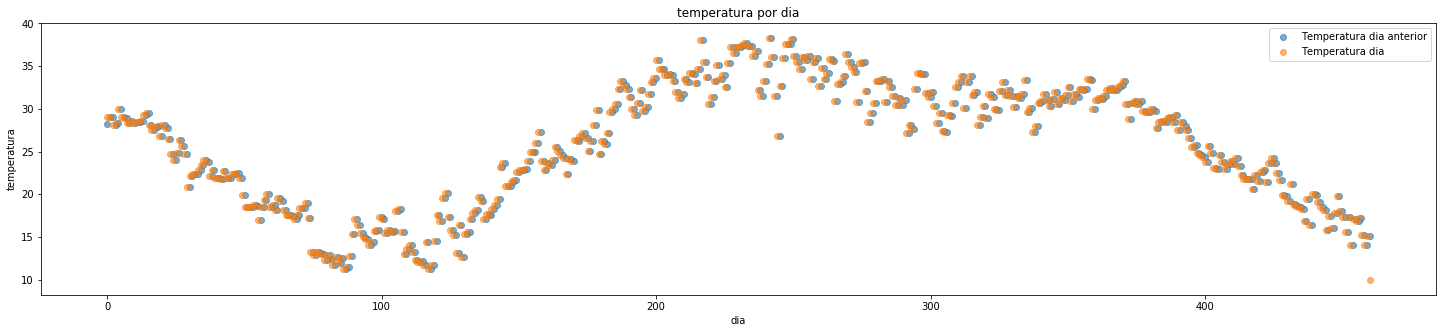

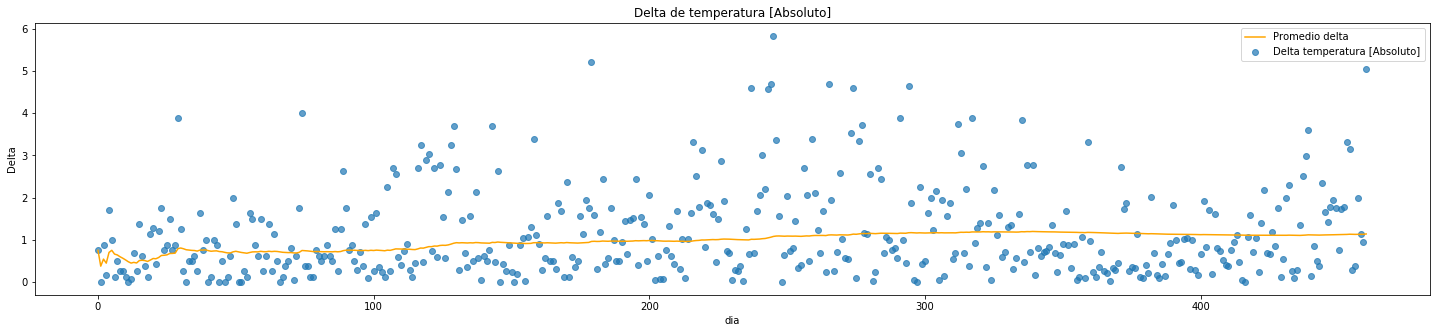

In [69]:
import matplotlib.pyplot as plt
import numpy as np

aux = []
for a in X_val:
    aux.append(a[0])

plt.figure(figsize=(25,5))
plt.scatter(list(range(len(y_val))),aux,label="Temperatura dia anterior",alpha=0.6)
plt.scatter(list(range(len(y_val))),y_val,label="Temperatura dia",alpha=0.6)
plt.xlabel('dia')
plt.ylabel('temperatura')
plt.title('temperatura por dia')
plt.legend()
plt.show()

aux2 = []
prom = []
i = 0
suma = 0.0
for a,b in zip(aux,y_val):
    i += 1
    suma += abs(a-b)
    aux2.append(abs(a-b))
    prom.append(suma/i)

plt.figure(figsize=(25,5))
plt.scatter(list(range(len(y_val))),aux2,label="Delta temperatura [Absoluto]",alpha=0.7)
plt.plot(prom,label="Promedio delta",color="orange")
plt.xlabel('dia')
plt.ylabel('Delta')
plt.title('Delta de temperatura [Absoluto]')
plt.legend()
plt.show()

Los gráficos toman el conjunto de validación por ser más facil de trabajar con debido a su tamaño, en los gráficos podemos notar que la temperatura del dia y la anterior tienen un delta pequeño, además podemos observar el comportamiento del clima durante el periodo de un año y se **aprecia un comportamiento cíclico**.

Si apreciamos el segundo gráfico nos daremos cuenta que el promedio del delta no supera un grado de diferencia en el conjunto, además que el intervalo de diferencia entre la temperatura de un dia al otro se mantiene relativamente a no mas de dos grados ($\pm 2$), por lo tanto es relativamente válido el solo usar la temperatura del día anterior como referente para predecir la temperatura del día, ya que la diferencia en términos de la percepción térmica no sería muy descabellado con un error pequeño cercano a los dos grados y outliers que van de los 4 a 6 grados.

## Árbol de regresión [Regularizado y no regularizado]

Entrenaremos dos arboles de regresión con los datos que tenemos en nuestra posesión, uno regularizado y otro no.

In [50]:
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )

# Arbol no regularizado sin limite de profundidad
from sklearn.tree import DecisionTreeRegressor as Tree
model_unr = Tree()
model_unr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [75]:
Profundidad = np.arange(1, X_train.shape[1], 2)   
Muestras = np.arange(2, X_train.shape[0] , 250)

Modelos = []
Nombre_Modelos = []
i = 1

for P in Profundidad:
    for M in Muestras:
        model_reg = Tree()
        model_reg.set_params(max_depth = P, min_samples_split = M)
        model_reg.fit(X_train,y_train)
        Modelos.append(model_reg)
        Nombre_Modelos.append("Modelo Regulado {} [Profundidad: {} - Muestras: {}]".format(i,P,M))
        i += 1

for nombre in Nombre_Modelos:
    print(nombre)

Modelo Regulado 1 [Profundidad: 1 - Muestras: 2]
Modelo Regulado 2 [Profundidad: 1 - Muestras: 252]
Modelo Regulado 3 [Profundidad: 1 - Muestras: 502]
Modelo Regulado 4 [Profundidad: 1 - Muestras: 752]
Modelo Regulado 5 [Profundidad: 3 - Muestras: 2]
Modelo Regulado 6 [Profundidad: 3 - Muestras: 252]
Modelo Regulado 7 [Profundidad: 3 - Muestras: 502]
Modelo Regulado 8 [Profundidad: 3 - Muestras: 752]
Modelo Regulado 9 [Profundidad: 5 - Muestras: 2]
Modelo Regulado 10 [Profundidad: 5 - Muestras: 252]
Modelo Regulado 11 [Profundidad: 5 - Muestras: 502]
Modelo Regulado 12 [Profundidad: 5 - Muestras: 752]
Modelo Regulado 13 [Profundidad: 7 - Muestras: 2]
Modelo Regulado 14 [Profundidad: 7 - Muestras: 252]
Modelo Regulado 15 [Profundidad: 7 - Muestras: 502]
Modelo Regulado 16 [Profundidad: 7 - Muestras: 752]
Modelo Regulado 17 [Profundidad: 9 - Muestras: 2]
Modelo Regulado 18 [Profundidad: 9 - Muestras: 252]
Modelo Regulado 19 [Profundidad: 9 - Muestras: 502]
Modelo Regulado 20 [Profundidad

Con este codigo obtenemos un modelo no regularizado y 20 modelos regularizados los cuales varian sus parametros de profundidad segun las listas impresas en el código anterior.

El utilizar un árbol de decisión no requiere escalar los datos, puesto que los nodos del árbol divide los datos en dos conjuntos, en donde compara una característica que separa el conjunto de la mejor manera posible dado un valor de referencia.

### Evaluación de la calidad de la predicción

Haremos uso de la metrica *RMSE*, la cual la visualizaremos con el pasar del tiempo

RMSE train = 0.0
RMSE val = 2.512996967027495


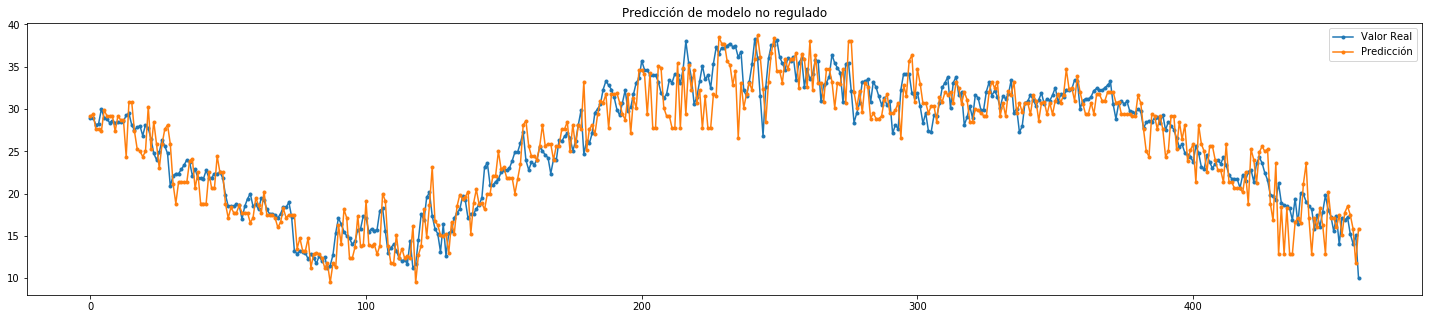

In [76]:
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)

print("RMSE train =", RMSE(y_train,y_train_hat))
print("RMSE val =", RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.title("Predicción de modelo no regulado")
plt.plot(y_val, '.-',label="Valor Real")
plt.plot(y_val_hat, '.-',label="Predicción")
plt.legend()
plt.show()

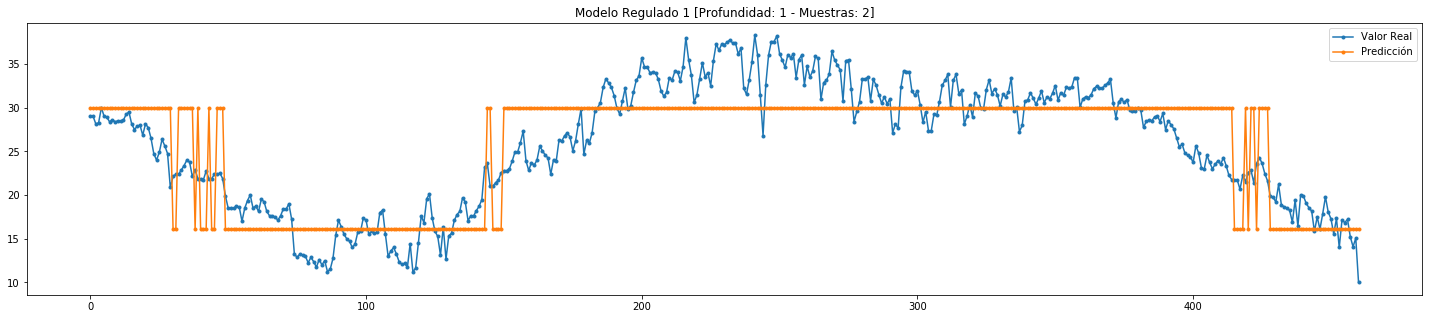

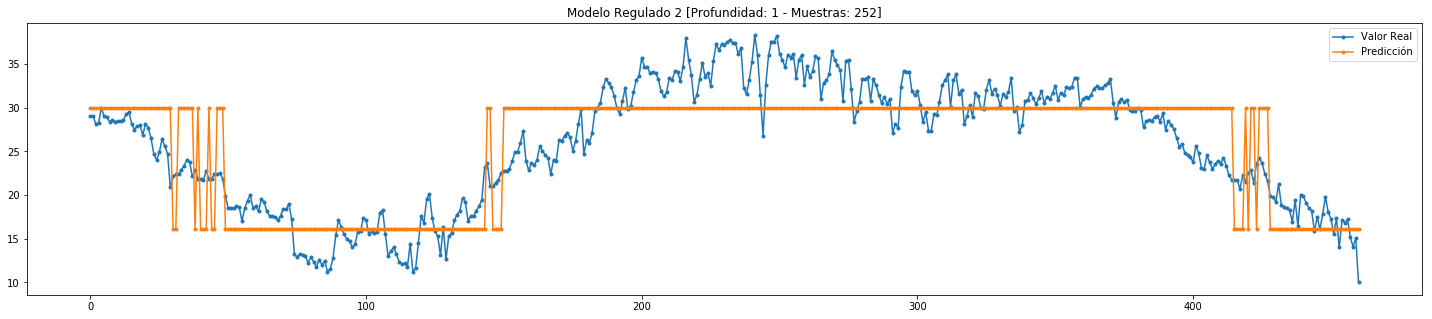

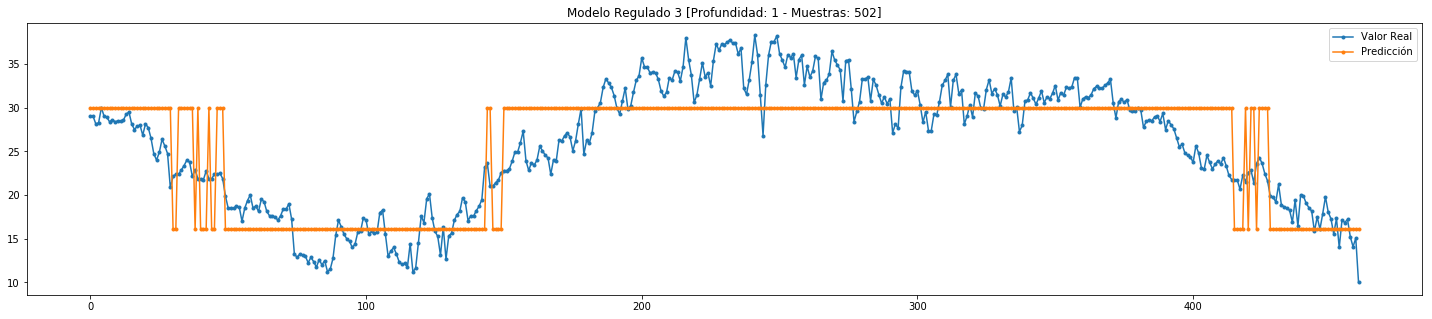

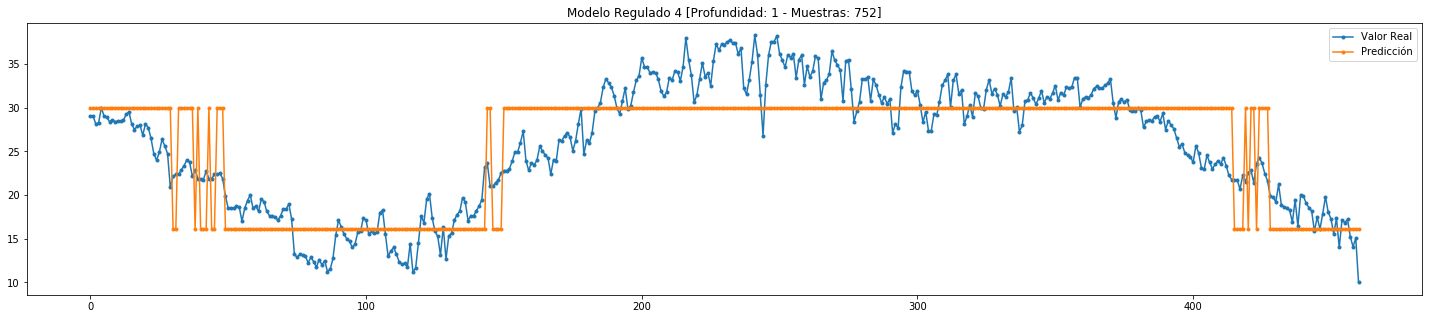

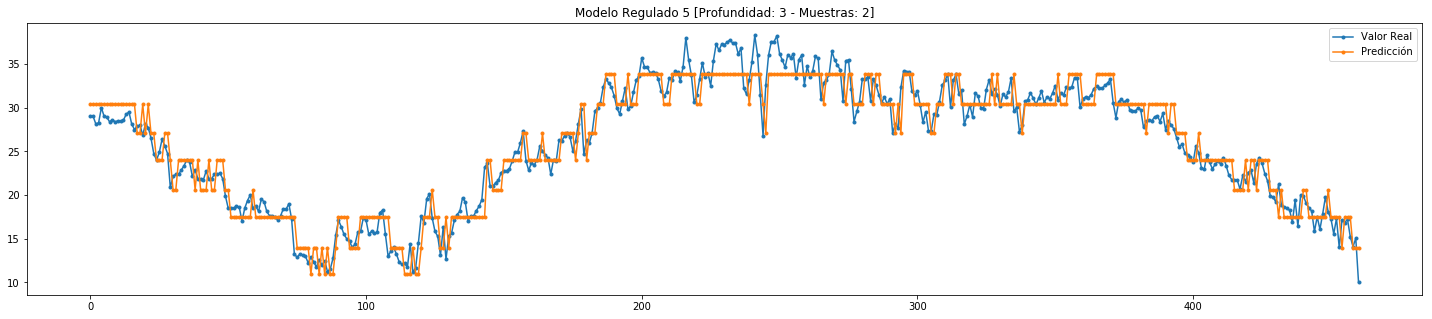

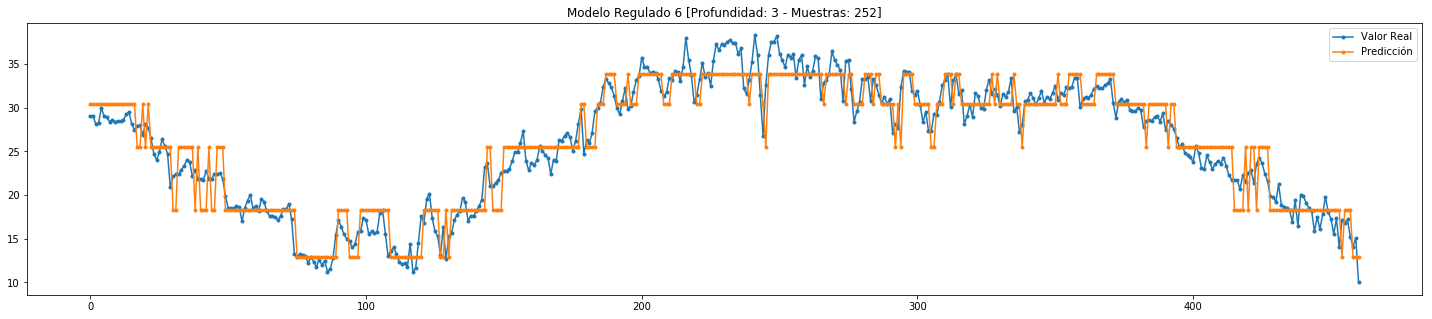

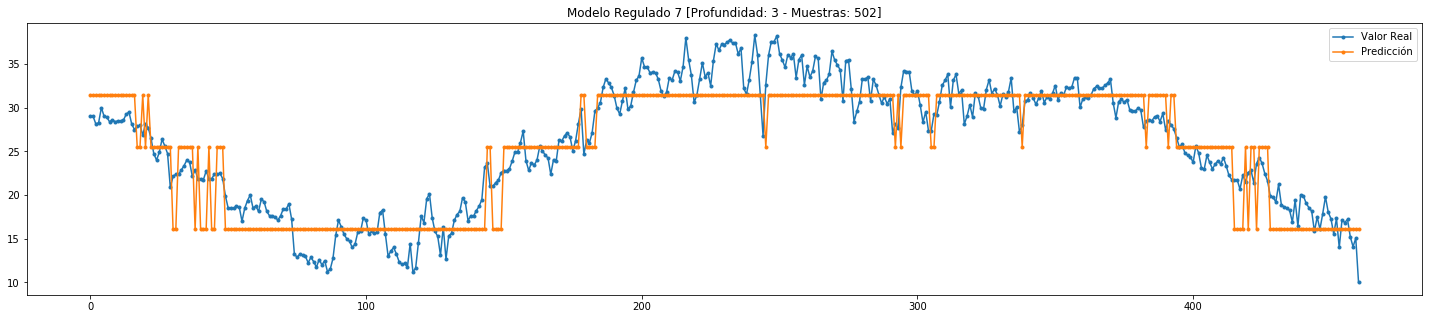

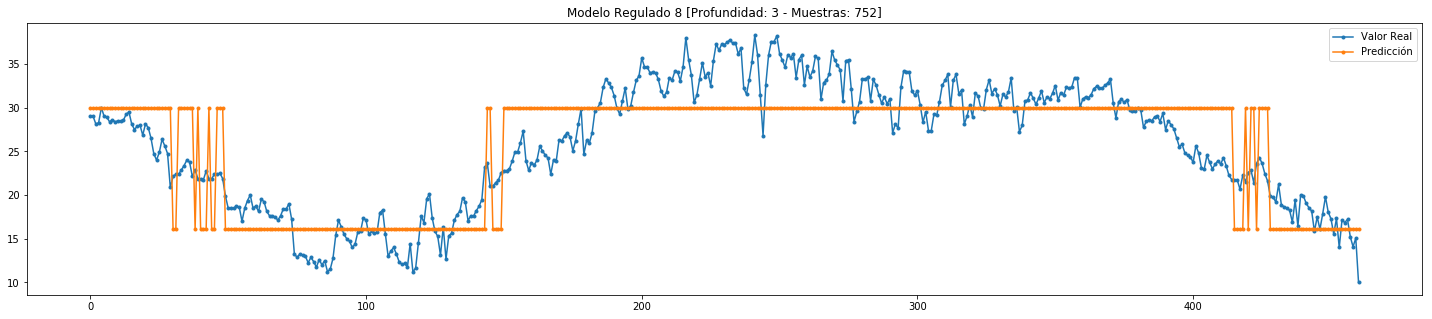

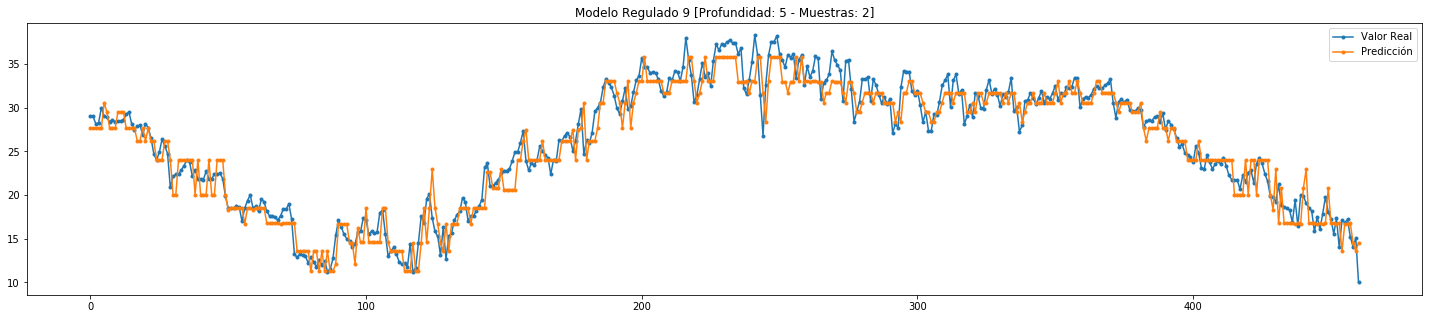

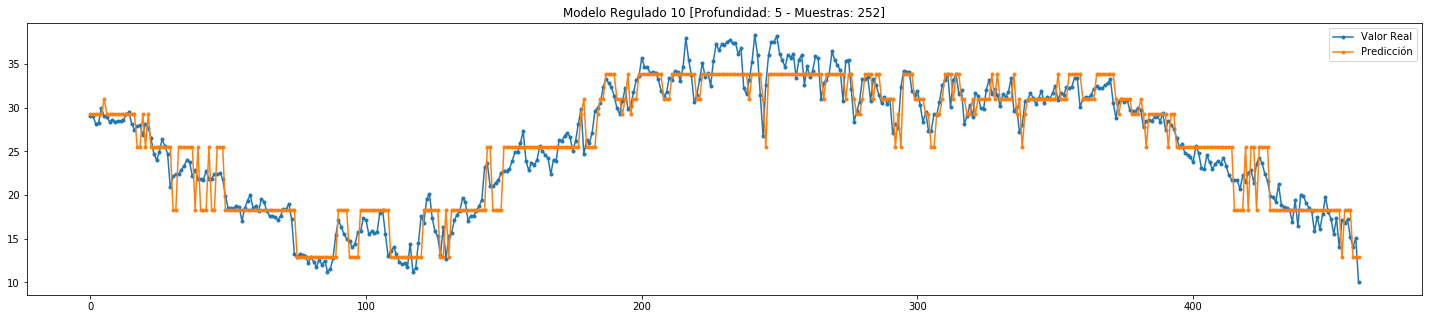

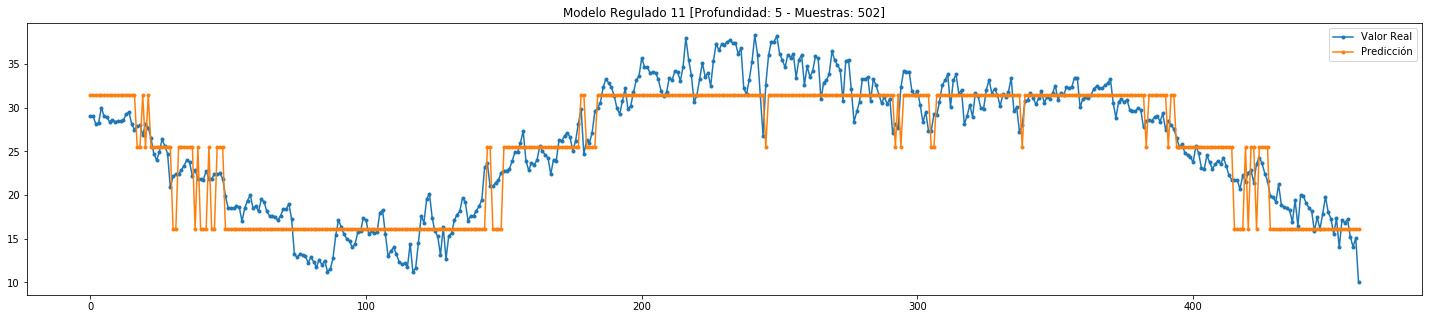

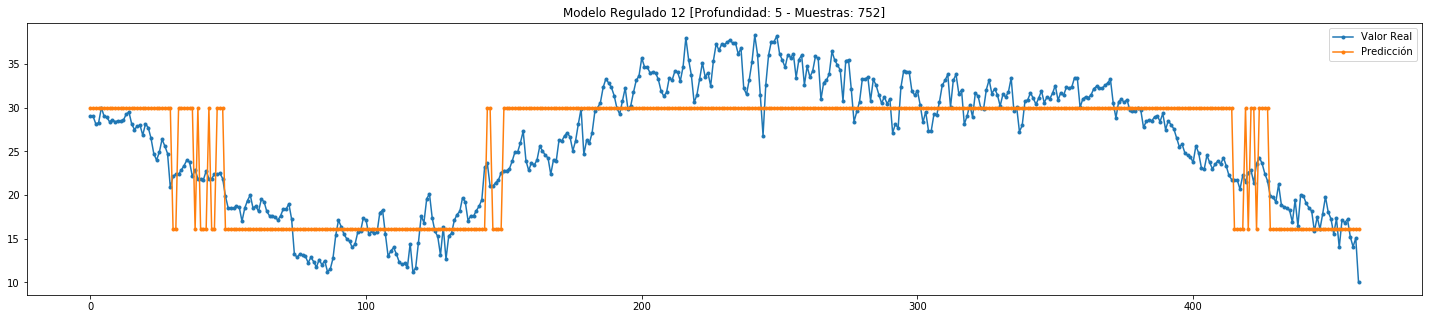

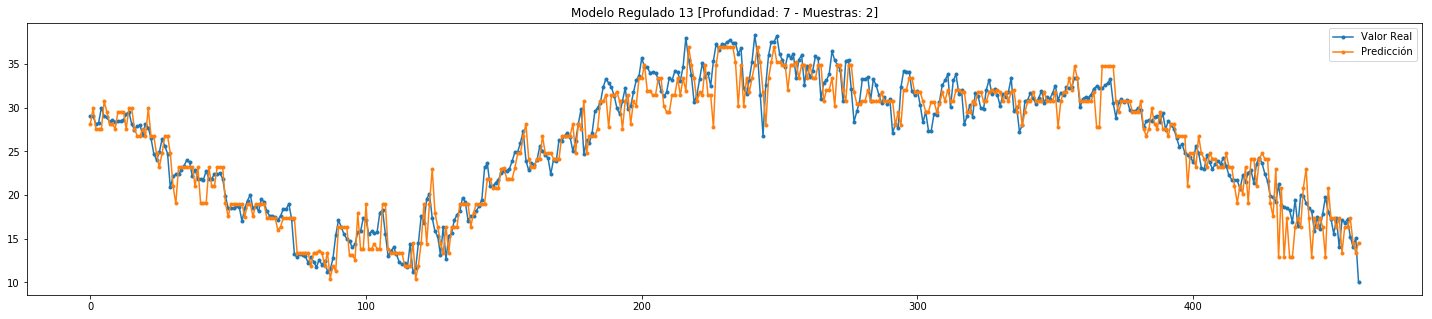

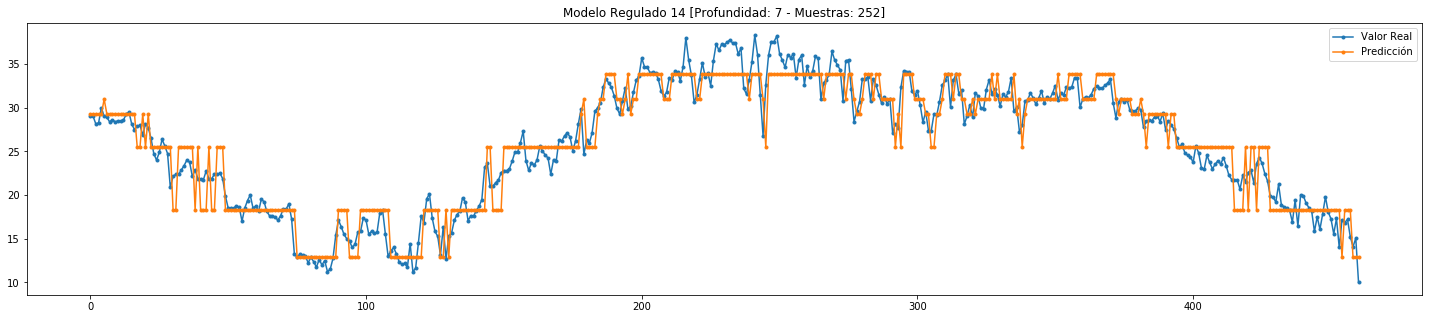

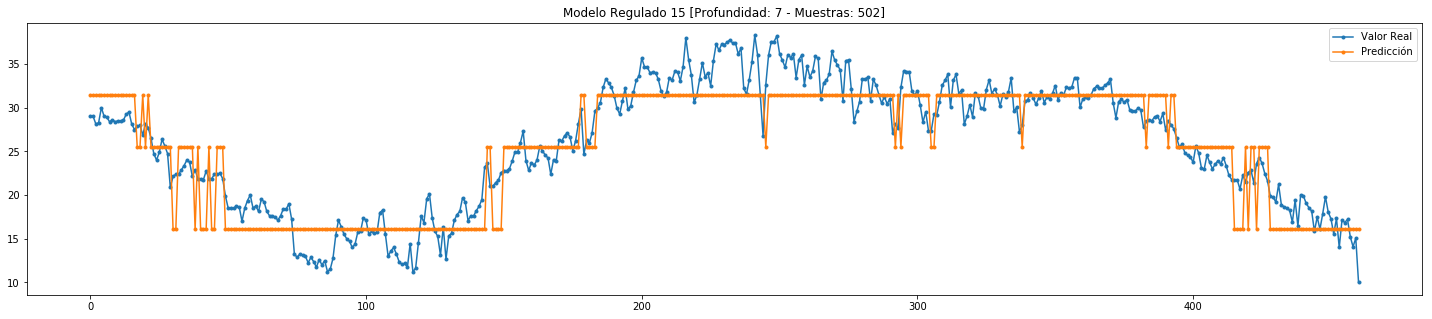

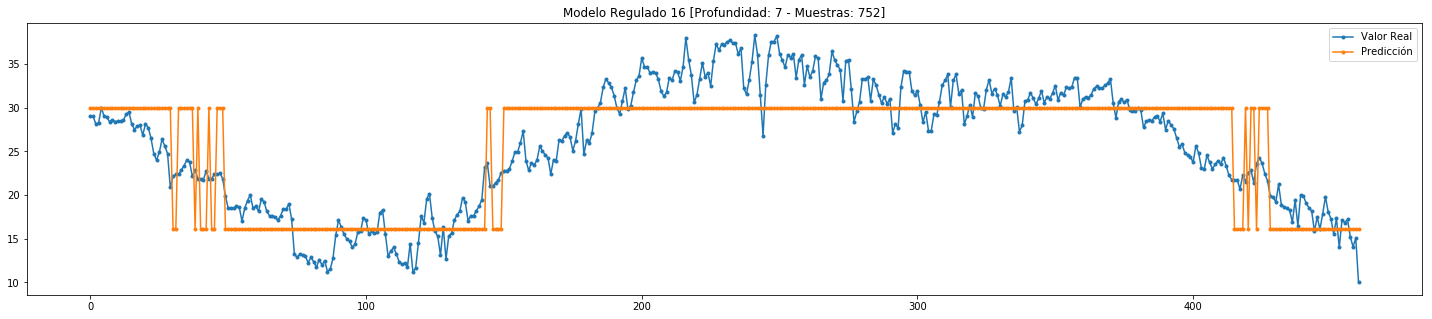

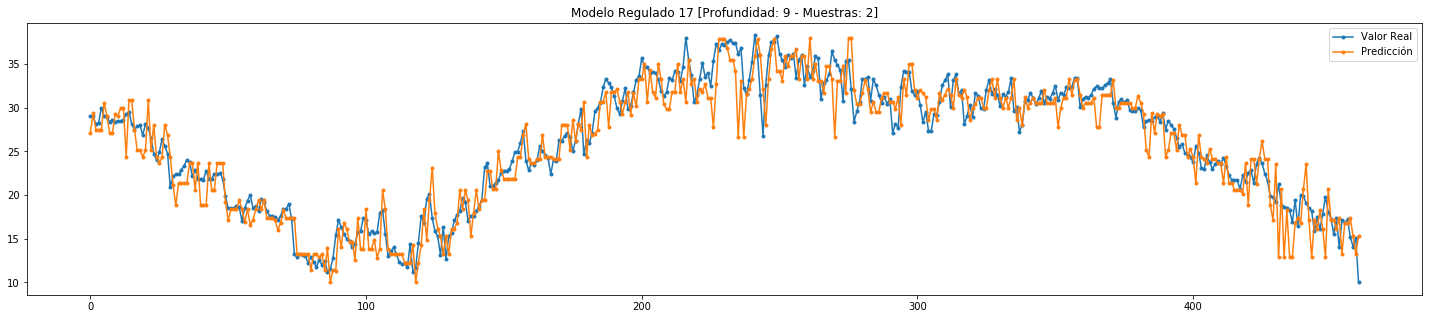

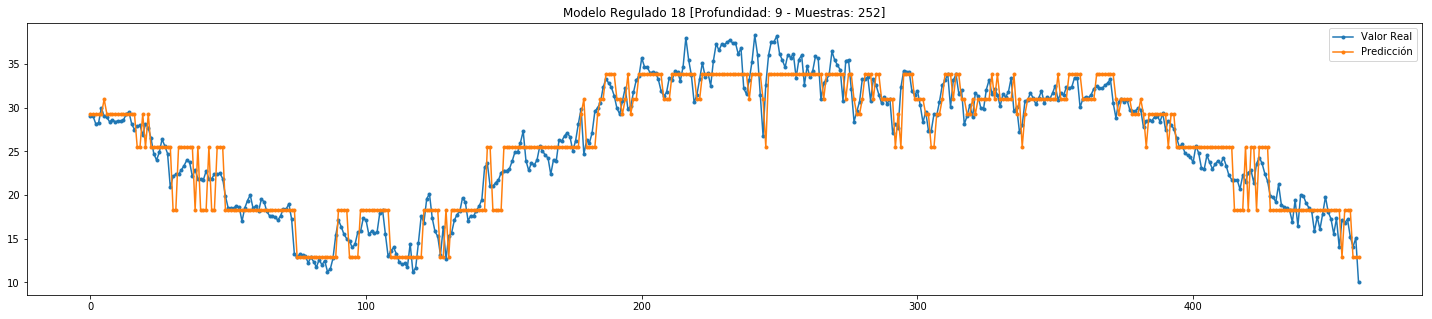

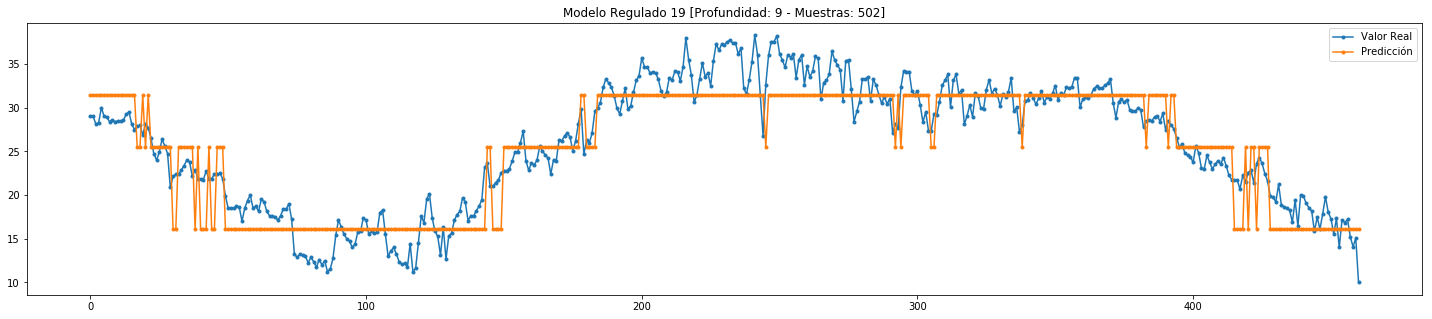

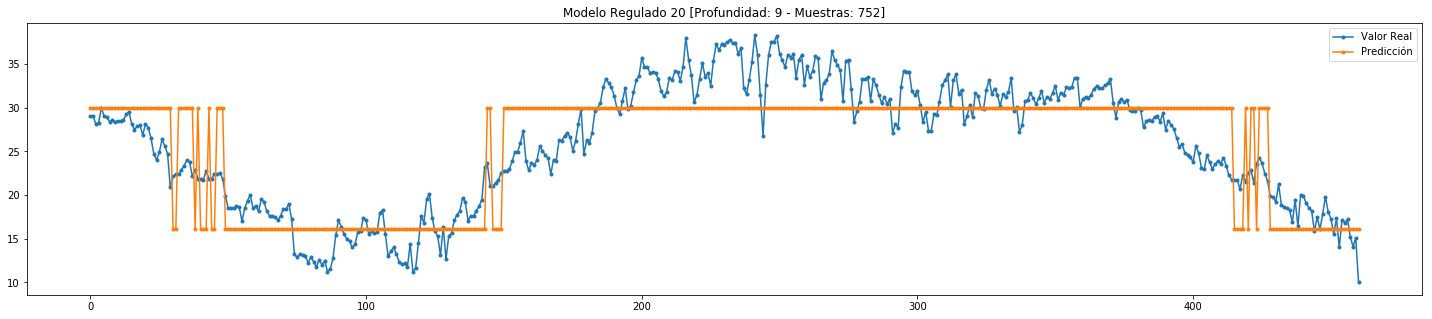

In [77]:
rmsetrain = []
rmseval = []

for modelo,title in zip(Modelos,Nombre_Modelos):
    y_train_hat = modelo.predict(X_train)
    y_val_hat = modelo.predict(X_val)
    rmsetrain.append(RMSE(y_train,y_train_hat))
    rmseval.append(RMSE(y_val,y_val_hat))
    plt.figure(figsize=(25,5))    
    plt.title(title)
    plt.plot(y_val, '.-',label="Valor Real")
    plt.plot(y_val_hat, '.-',label="Predicción")
    plt.legend()
    plt.show()

Modelo Regulado 1 [Profundidad: 1 - Muestras: 2]
>> RMSE train =  3.567413761517928
>> RMSE val =  3.922173970900396

Modelo Regulado 2 [Profundidad: 1 - Muestras: 252]
>> RMSE train =  3.567413761517928
>> RMSE val =  3.9221739709003955

Modelo Regulado 3 [Profundidad: 1 - Muestras: 502]
>> RMSE train =  3.567413761517928
>> RMSE val =  3.922173970900396

Modelo Regulado 4 [Profundidad: 1 - Muestras: 752]
>> RMSE train =  3.567413761517928
>> RMSE val =  3.922173970900396

Modelo Regulado 5 [Profundidad: 3 - Muestras: 2]
>> RMSE train =  1.8860218948939758
>> RMSE val =  1.854738354219499

Modelo Regulado 6 [Profundidad: 3 - Muestras: 252]
>> RMSE train =  2.1468638280736316
>> RMSE val =  2.1380012259195724

Modelo Regulado 7 [Profundidad: 3 - Muestras: 502]
>> RMSE train =  2.8732430042395802
>> RMSE val =  2.875516249381712

Modelo Regulado 8 [Profundidad: 3 - Muestras: 752]
>> RMSE train =  3.567413761517928
>> RMSE val =  3.922173970900396

Modelo Regulado 9 [Profundidad: 5 - Mue

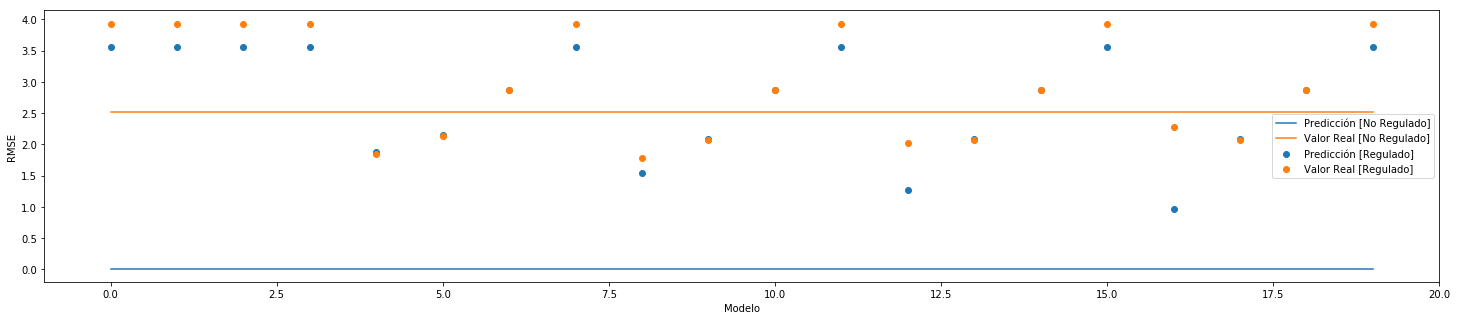

In [85]:
for i in range(len(rmsetrain)):
    print(Nombre_Modelos[i])
    print(">> RMSE train = ", rmsetrain[i])
    print(">> RMSE val = ", rmseval[i])
    print()

RMSE_train = 0.0
RMSE_val = 2.512996967027495
plt.figure(figsize=(25,5))
plt.scatter(range(len(rmsetrain)),rmsetrain,label="Predicción [Regulado]")
plt.scatter(range(len(rmseval)),rmseval,label="Valor Real [Regulado]")
plt.plot(range(len(rmsetrain)),[RMSE_train]*len(rmsetrain),label="Predicción [No Regulado]")
plt.plot(range(len(rmseval)),[RMSE_val]*len(rmseval),label="Valor Real [No Regulado]")
plt.xlabel("Modelo")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Realizamos algunas varaciones en nuestros parámetros para el caso de el árbol regulado, en donde algunos tuvieron mejor RMSE de predicción que el modelo no regularizado, pero en ningún caso sucedio en el RMSE de entrenamiento, el menor RMSE lo obtenemos con el modelo regularizado número nueve, el cual tiene una profundidad de $5$ y una muestra de $2$.

## Ensamblado de árboles [Bagging]

Usaremos la técnica de bagging para entrenar un ensamblado de árboles.

Arbol no Regularizado
>> RMSE train = 0.7807543856009367
>> RMSE val = 1.7233902680266766


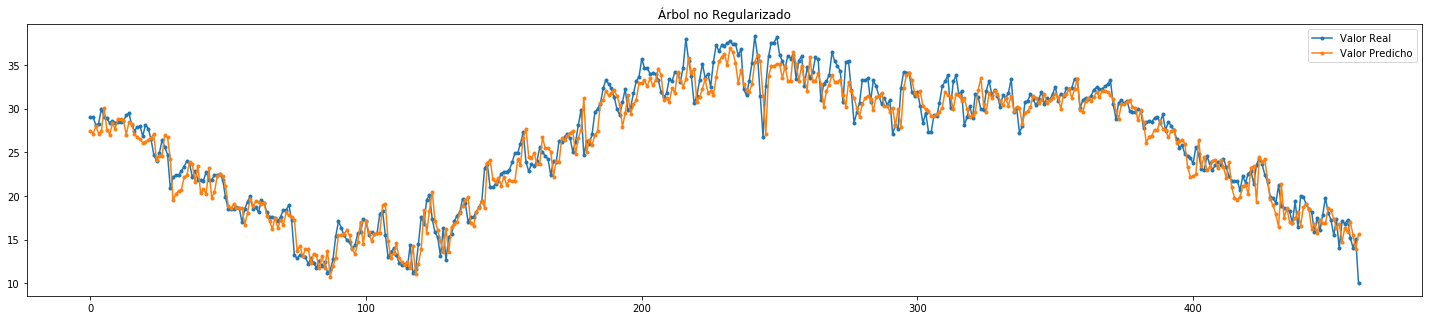

Árbol Regularizado [Modelo 9]
>> RMSE train = 1.45658114782428
>> RMSE val = 1.6033586651787863


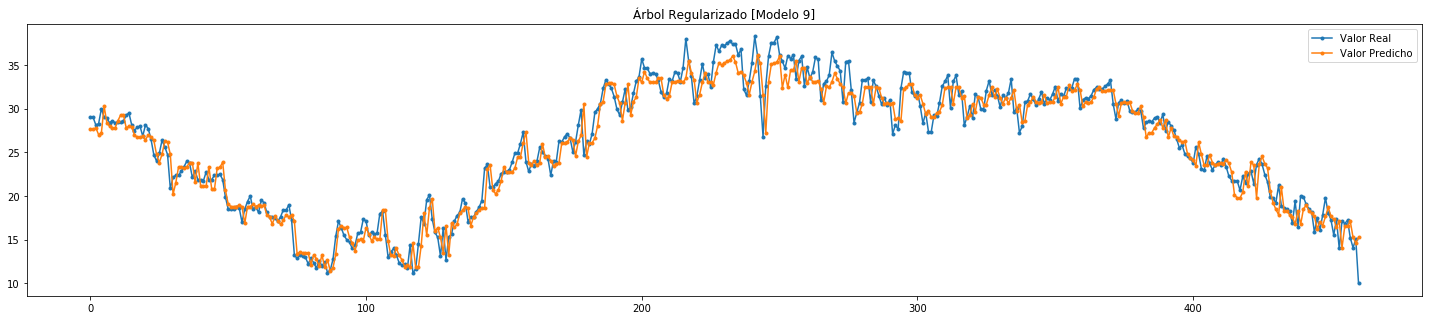

In [89]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(base_estimator=Tree(), n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("Arbol no Regularizado")
print(">> RMSE train =",RMSE(y_train,y_train_hat))
print(">> RMSE val =",RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Real")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol no Regularizado")
plt.legend()
plt.show()

model = BaggingRegressor(base_estimator=Tree(max_depth = 5, min_samples_split = 2), n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("Árbol Regularizado [Modelo 9]")
print(">> RMSE train =",RMSE(y_train,y_train_hat))
print(">> RMSE val =",RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Real")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol Regularizado [Modelo 9]")
plt.legend()
plt.show()

Obtenemos algo similar a lo anterior, un RMSE de entrenamiento mucho menor en el árbol no regularizado, pero en contraparte el RMSE de predicción es menor para el árbol regularizado con el modelo 9.

Podemos notar que el RMSE puede subir de valor al ingresar algunos datos (entre los dias 180 al 280), pero la situación se estabiliza por lo cual podemos inferenciar que no existe overfitting, dado que obtenemos mejores resultados mientras el número de estimadores es mayor.

## Ensambladores de árboles [AdaBoost]

Similar a la sección anterior, esta vez cambiaremos de técnica a AdaBoost

Arbol no Regularizado
>> RMSE train = 0.21226323344401601
>> RMSE val = 1.8195234275920196


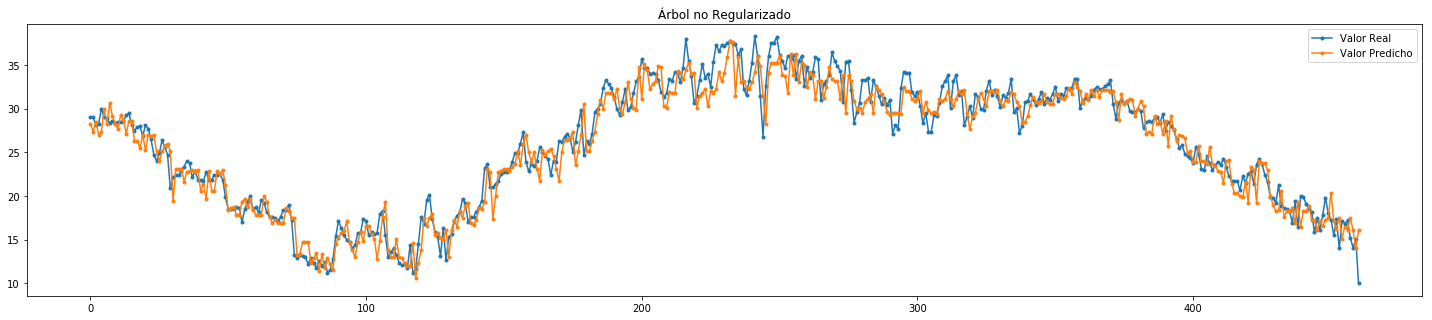

Arbol Regularizado [Modelo 9]
>> RMSE train = 1.4378614058572636
>> RMSE val = 1.714754860215562


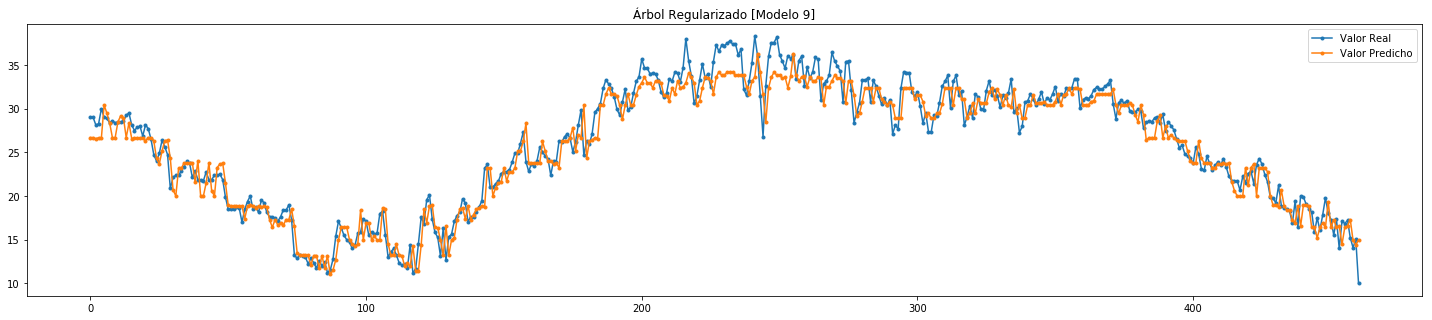

In [91]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(base_estimator=Tree(), n_estimators=10)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("Arbol no Regularizado")
print(">> RMSE train =",RMSE(y_train,y_train_hat))
print(">> RMSE val =",RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Real")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol no Regularizado")
plt.legend()
plt.show()

model = AdaBoostRegressor(base_estimator=Tree(max_depth = 5, min_samples_split = 2), n_estimators=10)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("Arbol Regularizado [Modelo 9]")
print(">> RMSE train =",RMSE(y_train,y_train_hat))
print(">> RMSE val =",RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Real")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol Regularizado [Modelo 9]")
plt.legend()
plt.show()

El árbol no regularizado tiene un valor muy bajo de RMSE en cuanto a entrenamiento (menor que bagging), en contraste con el árbol regularizado el cual es mayor pero similar al de la sección anterior. En cuanto a los valores de RMSE de predicción estos son levemente más altos que los de la técnica anterior.

En esta sección no hay indicios de overfitting, ya que al aumentar la cantidad de entradas la diferencias entre la predicción y el valor real no aumenta.

El funcionamiento de Adaboost por sklearn utiliza tanto re-muestreo como pesar ejemplos, esto es debido a que los datos del conjunto original ajusta un regresor el cual ingresa copias adicionales del regresor al conjunto de datos, pero estos pesos son ajustados según el error de la predicción en el momento, por ende es más recomendable utilizar pesar ejemplos debido a la varianza de importancia entre elementos.

Cuando se hace aumento de la cantidad de estimadores, no hay una tendencia clara en el RMSE, por lo cual no podemos inferir información sobre este elemento en particular.

## Ensambladores de árboles [Random Forest]

Similar a la sección anterior, esta vez cambiaremos de técnica a Random Forest

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Arbol no Regularizado
>> RMSE train = 0.7593040470016439
>> RMSE val = 1.750495000195969


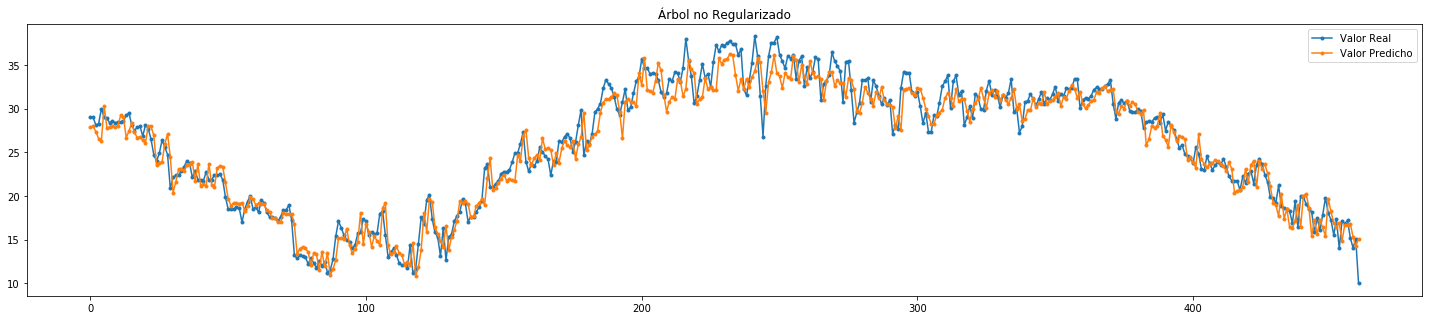

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Arbol Regularizado
>> RMSE train = 1.453462789321944
>> RMSE val = 1.5768466371510363


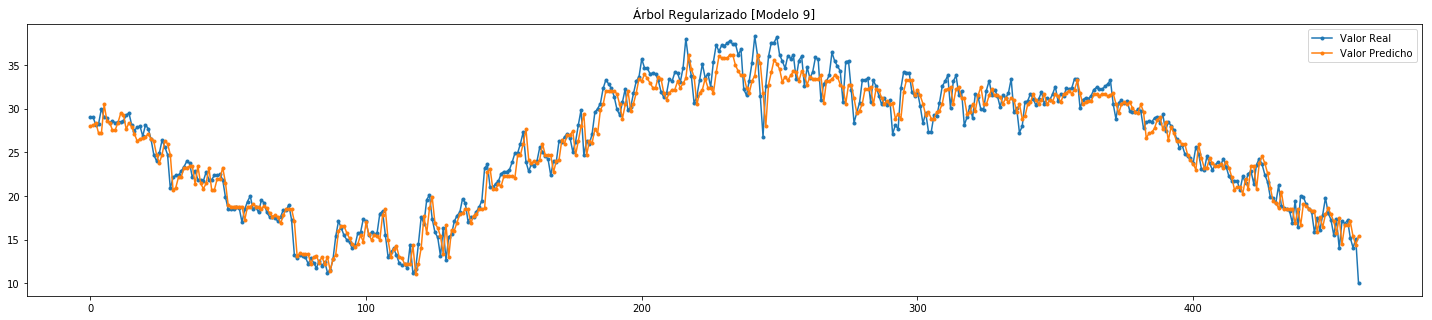

In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, n_jobs=-1,oob_score = True)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_val_hat = model.predict(X_val)
print("Arbol no Regularizado")
print(">> RMSE train =",RMSE(y_train,y_train_hat))
print(">> RMSE val =",RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Real")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol no Regularizado")
plt.legend()
plt.show()

model_unr = RandomForestRegressor(n_estimators=10, n_jobs=-1,max_depth = 5, min_samples_split = 2,oob_score = True)
model_unr.fit(X_train,y_train)
y_train_hat = model_unr.predict(X_train)
y_val_hat = model_unr.predict(X_val)
print("Arbol Regularizado")
print(">> RMSE train =",RMSE(y_train,y_train_hat))
print(">> RMSE val =",RMSE(y_val,y_val_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Real")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol Regularizado [Modelo 9]")
plt.legend()
plt.show()

La situación es la misma que con la técnica de *bagging*, aunque hay una mejora comparativa con esta técnica en general al bajar los valores de RMSE en general, tanto en entrenamiento como en la predicción.

Similar a la sección de bagging y Adaboost no observamos overfitting.

## Out of Bag (OOB) Error

Verificaremos el error OOB de los ensambladores que utilizan bootstrap.

In [96]:
oob_error = model.oob_score_
val_error = model.score(X_val,y_val)
print("Modelo árbol no regularizado")
print(">> OOB error:", oob_error)
print (">> Error validación:", val_error)
print()

oob_error = model_unr.oob_score_
val_error = model_unr.score(X_val,y_val)
print("Modelo árbol regularizado")
print(">> OOB error:", oob_error)
print (">> Error validación:", val_error)

Modelo árbol no regularizado
>> OOB error: 0.8323718780288266
>> Error validación: 0.9389605231238917

Modelo árbol regularizado
>> OOB error: 0.7958543723919342
>> Error validación: 0.9504700412692446


Podemos afirmar que el error OOB sirve como métrica generalizadora, puesto que obtenemos un error menor al observado en la validación, además dada la naturaleza de la variable estudiada (temperatura media) notamos que el error para esta es relativamente bajo. 

## Combinación de ensamblados

Combinaremos ensamblados para comparar con lo hecho hasta el momento

In [100]:
def minimo(y,val):
    MIN = 1000
    for a in val:
        if abs(y - a) < MIN:
            MIN = abs(y - a)
            valor = a
    return valor

def combine_predictions(predictions):
    n = len(predictions)
    y_pred = []
    for i in range(len(y_val)):
        valores = []
        valores.append(predictions[0][i])
        valores.append(predictions[1][i])
        valores.append(predictions[2][i])
        valores.append(predictions[3][i])
        valores.append(predictions[4][i])
        valores.append(predictions[5][i])
        valores.append(predictions[6][i])
        valores.append(predictions[7][i])
        valores.append(predictions[8][i])
        valores.append(predictions[9][i])
        minim = minimo(y_val[i],valores)
        y_pred.append(minim)
    return y_pred

list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)

print("RMSE val =", RMSE(y_val, new_predictions))

RMSE val = 0.6308318040332016


In [98]:
for i in range(len(list_predictions)):
    print("RMSE val =", RMSE(y_val, list_predictions[i]))

RMSE val = 2.3938433347037793
RMSE val = 2.399220445561151
RMSE val = 2.3673212031481943
RMSE val = 2.453483309157594
RMSE val = 2.26747684096442
RMSE val = 2.233854733784154
RMSE val = 2.6859027890499605
RMSE val = 2.3450627636692642
RMSE val = 2.4120130742247183
RMSE val = 2.23337313320162


Notamos que al combinar las predicciones de los estimadores, el RMSE baja de manera notoria ($0.63$), de valores que abordaba orignalmente entre $2.23$ a $2.68$

## Intervalo de confinaza de ensamblado

Visualizaremos un intervalo de confianza del $95\%$, asumiendo una dostribución normal

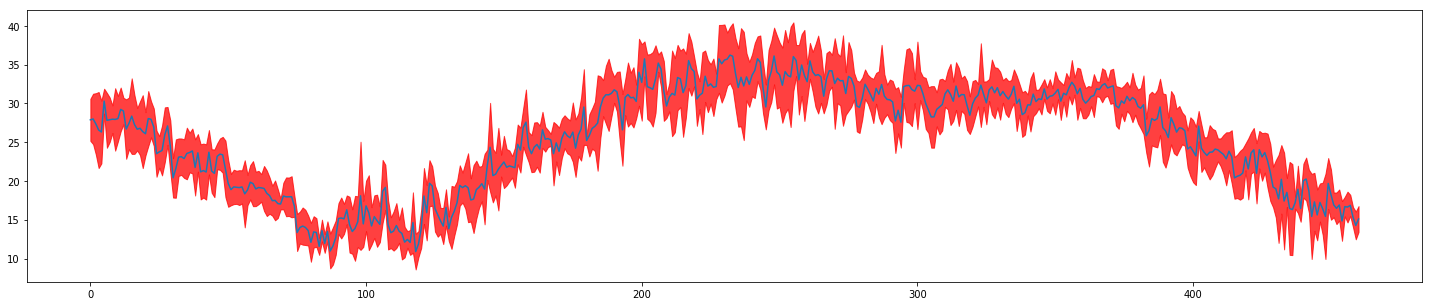

In [102]:
from scipy.stats import norm

X_val_est = np.vstack(list_predictions).T
interv_val = []

for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])

interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(25,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.75)
plt.show()

Al saber que la distribución normal centra el dato en cuestión, podemos decir que el comportamiento de este es normal, debido a que la linea de los datos esta centrada en el intervalo (área roja) que definimos como aceptable.

## Evaluación de mejor modelo

Evaluaremos con el conjunto de prueba el mejor modelo hasta el momento, además compararemos y analizaremos las distintas maneras que hemos resuelto el problema hasta el momento

In [105]:
# Cargamos el conjunto de Pruebas
df = pd.read_csv("DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1]
# Modificamos la cantidad de columnas y eliminamos la fecha
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season'])
df.drop(["date"], axis=1, inplace=True)
# Columnas faltantes debido a la cantidad de meses en el conjunto
n_zero = np.zeros(113,dtype=int)
df["season_fall"] = n_zero
df["season_rainy"] = n_zero

y_test = df.pop("y_value").values  
X_test = df.values 

In [107]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_summer,season_winter,season_fall,season_rainy
0,15.913043,85.869565,2.743478,59.000000,6,2017,1,0,1,0,0
1,18.500000,77.222222,2.894444,1018.277778,0,2017,1,0,1,0,0
2,17.111111,81.888889,4.016667,1018.333333,1,2017,1,0,1,0,0
3,18.700000,70.050000,4.545000,1015.700000,2,2017,1,0,1,0,0
4,18.388889,74.944444,3.300000,1014.333333,3,2017,1,0,1,0,0
5,19.318182,79.318182,8.681818,1011.772727,4,2017,1,0,1,0,0
6,14.708333,95.833333,10.041667,1011.375000,5,2017,1,0,1,0,0
7,15.684211,83.526316,1.950000,1015.550000,6,2017,1,0,1,0,0
8,14.571429,80.809524,6.542857,1015.952381,0,2017,1,0,1,0,0
9,12.111111,71.944444,9.361111,1016.888889,1,2017,1,0,1,0,0


Haremos uso del modelo Random Forest el cual nos dio un valor más bajo en el RMSE

Arbol no Regularizado
>> RMSE test = 1.7769662311947088


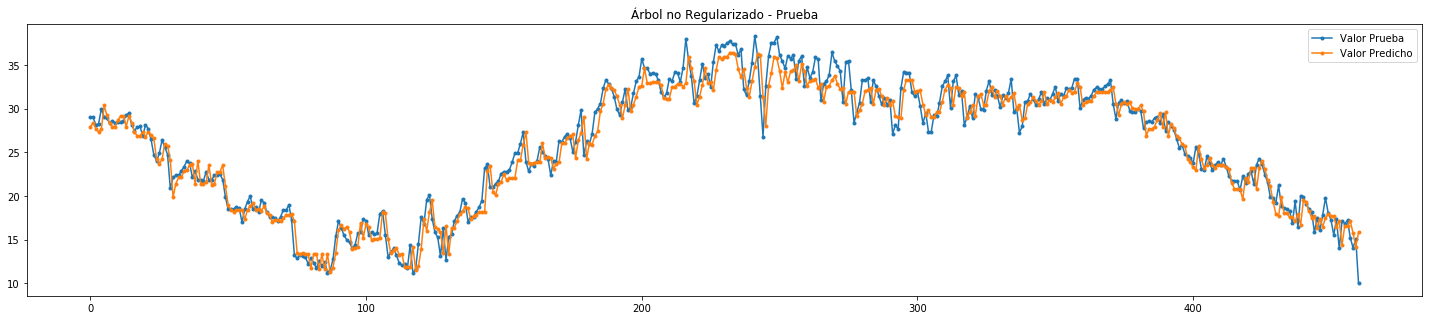

Arbol Regularizado
>> RMSE test = 1.718819355698109


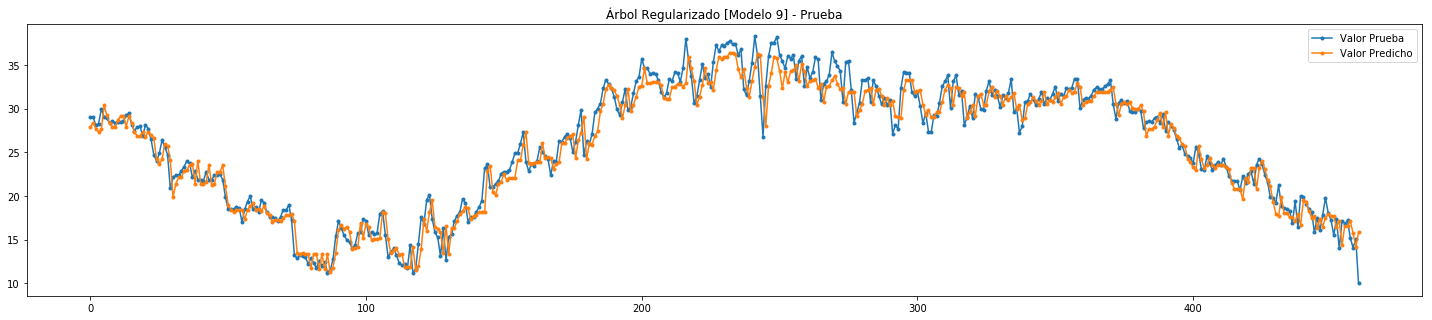

In [111]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
y_test_hat = model.predict(X_test)
print("Arbol no Regularizado")
print(">> RMSE test =",RMSE(y_test,y_test_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Prueba")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol no Regularizado - Prueba")
plt.legend()
plt.show()

model_unr = RandomForestRegressor(n_estimators=10, n_jobs=-1,max_depth = 5, min_samples_split = 2)
model_unr.fit(X_train,y_train)
y_test_hat = model_unr.predict(X_test)
print("Arbol Regularizado")
print(">> RMSE test =",RMSE(y_test,y_test_hat))

plt.figure(figsize=(25,5))
plt.plot(y_val, '.-' ,label="Valor Prueba")
plt.plot(y_val_hat, '.-' ,label="Valor Predicho")
plt.title("Árbol Regularizado [Modelo 9] - Prueba")
plt.legend()
plt.show()

Se obtuvo un error de $1.77$ con el árbol no regularizado y uno de $1.71$ con el árbol regularizado correspondiente al modelo 9, estos valores fueron un poco mayores respecto a lo obtenido al conjunto de validación, pero dentro del rango de error de otros modelos con ese conjunto.

Finalmente, le problema fue abordado por múltiples modelos de ensamblados con diversos niveles, además de ser regularizados o no. En general los valores con mejor rendimiento eran obtenidos por los árboles regularizados.